## Project Title: Analyzing Trends and Patterns in Electric Vehicle Adoption

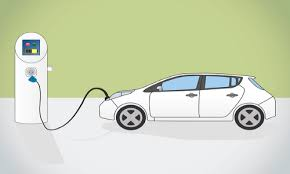

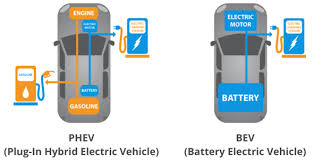

### Project Components: 
- Data Exploration and Cleaning 
- Descriptive Statistics and Visualization   
- Geographical Analysis  
- Market Analysis 
- Predictive Analysis 

### Tools and Technologies: 

- Python <br>
- Machine Learning <br>
- Jupyter Notebooks

In [44]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [45]:
ev = pd.read_csv(r'C:\Users\Admin\Downloads\Electric_Vehicle_Population_Data_CP2.csv')

In [46]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 17 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   VIN_(1-10)                                          181458 non-null  object 
 1   County                                              181455 non-null  object 
 2   City                                                181455 non-null  object 
 3   State                                               181458 non-null  object 
 4   Postal_Code                                         181455 non-null  float64
 5   Model _Year                                         181458 non-null  int64  
 6   Make                                                181458 non-null  object 
 7   Model                                               181458 non-null  object 
 8   Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility  181458 non-n

### Data Overview: 
- The dataset contains information about the population of electric vehicles.

### Here the dataset includes following columns:

1. VIN_(1-10): Partial VIN number (a set of 17 characters that are unique to the vehicle, like a vehicle's unique identity code)
2. County: County name
3. City: City name
4. State: State abbreviation
5. Postal_Code: Postal code
6. Model_Year: Year of the vehicle model
7. Make: Manufacturer of the vehicle
8. Model: Vehicle model
9. Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility: Eligibility status for clean alternative fuel vehicle
10. Electric_Range: Electric range of the vehicle
11. Base_MSRP: Base manufacturer's suggested retail price
12. Legislative_District: Legislative district number
13. DOL_Vehicle_ID: Department of Licensing vehicle ID
14. Vehicl_ Location: Location coordinates
15. Electric_Utility: Electric utility provider
16. 2020_Census_Tract: Census tract for the year 2020
17. Electric_Vehicle _Type: Type of electric vehicle (e.g., PHEV, BEV)

#### EDA : Exploratory Data Analysis

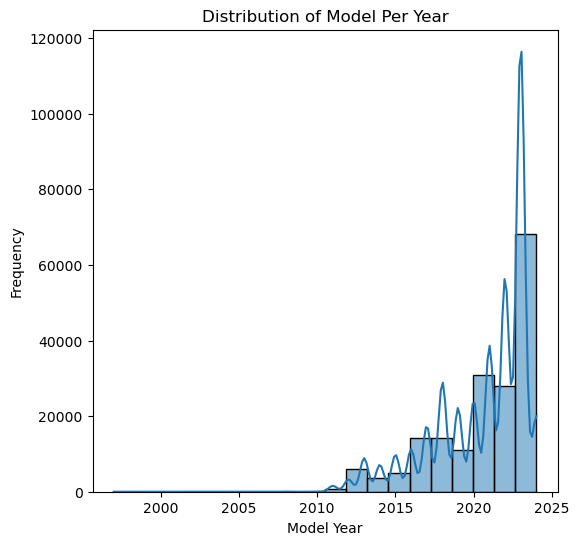

In [47]:
# Distribution of Model Year
plt.figure(figsize=(6, 6))
sns.histplot(ev['Model _Year'], bins=20, kde=True)
plt.title('Distribution of Model Per Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

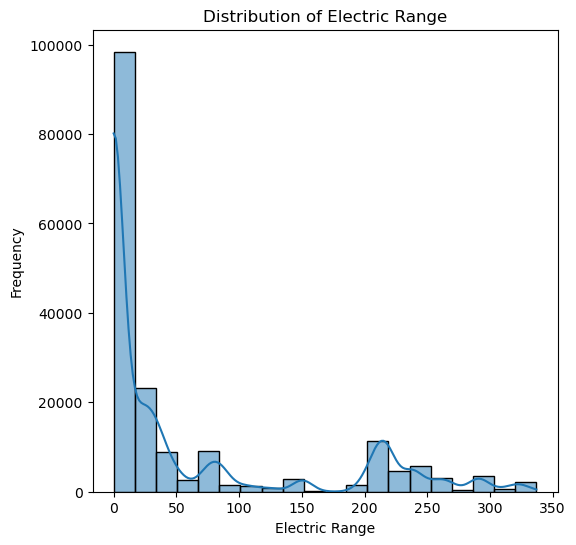

In [48]:
# Distribution of Electric Range Of the Vehicle
plt.figure(figsize=(6, 6))
sns.histplot(ev['Electric _Range'], bins=20, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

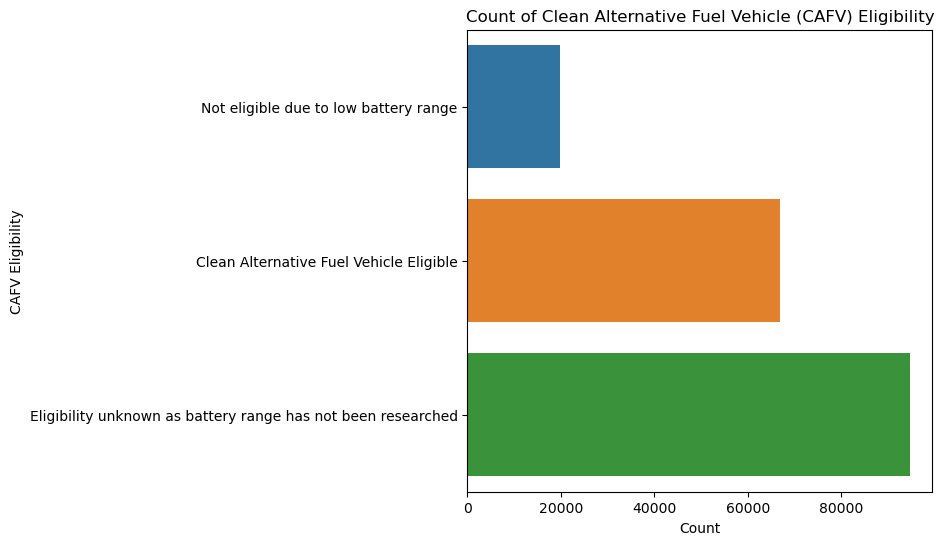

In [49]:
# Count of Clean Alternative Fuel Vehicle (CAFV) Eligibility
plt.figure(figsize=(6, 6))
sns.countplot(y=ev['Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility'])
plt.title('Count of Clean Alternative Fuel Vehicle (CAFV) Eligibility')
plt.xlabel('Count')
plt.ylabel('CAFV Eligibility')
plt.show()

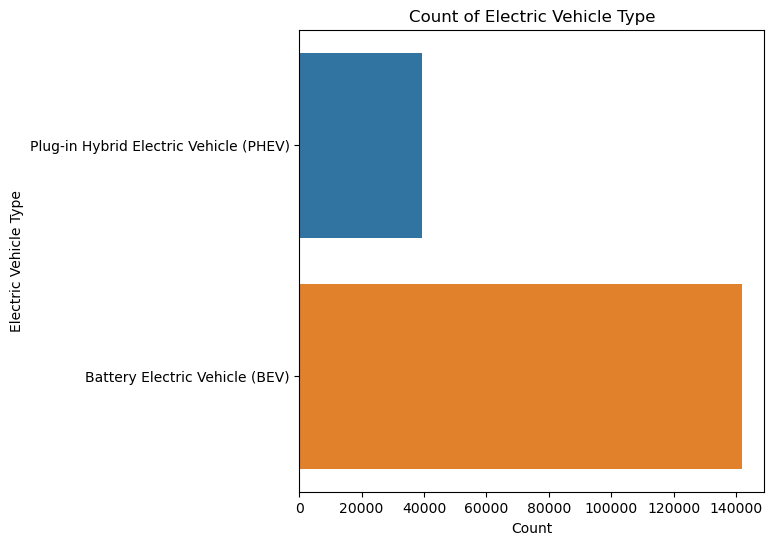

In [50]:
# Count of Electric Vehicle Type
plt.figure(figsize=(6, 6))
sns.countplot(y=ev['Electric_Vehicle _Type'])
plt.title('Count of Electric Vehicle Type')
plt.xlabel('Count')
plt.ylabel('Electric Vehicle Type')
plt.show()

In [51]:
import pandas as pd
import plotly.express as px

# Load the dataset

ev = pd.read_csv(r'C:\Users\Admin\Downloads\Electric_Vehicle_Population_Data_CP2.csv')

# Group by County and count the number of entries, then sort in descending order
county_counts = ev.groupby('County').count().sort_values(by='City', ascending=False)['City']

# Extract the top 10 counties and their counts
top_10_counties = county_counts.index[:10]
top_10_values = county_counts.values[:10]

# Create the bar plot using plotly.express
fig = px.bar(x=top_10_counties, y=top_10_values, labels={'x': 'County Name', 'y': 'Number of Cars'}, color=top_10_values, 
             title='Top 10 Counties with Most Entries')
fig.show()


In [52]:
# Group by Make and count the number of entries, then sort in descending order
make_counts = ev.groupby('Make').count().sort_values(by='City', ascending=False)['City']

# Extract the top 10 companies and their counts
top_10_makes = make_counts.index[:10]
top_10_make_values = make_counts.values[:10]

# Create the bar plot using plotly.express
fig = px.bar(x=top_10_makes, y=top_10_make_values, labels={'x': 'Company Name', 'y': 'Number of Electric Vehicles'}, color=top_10_make_values, 
             title='Top 10 Companies Making Most Electric Vehicles')
fig.show()

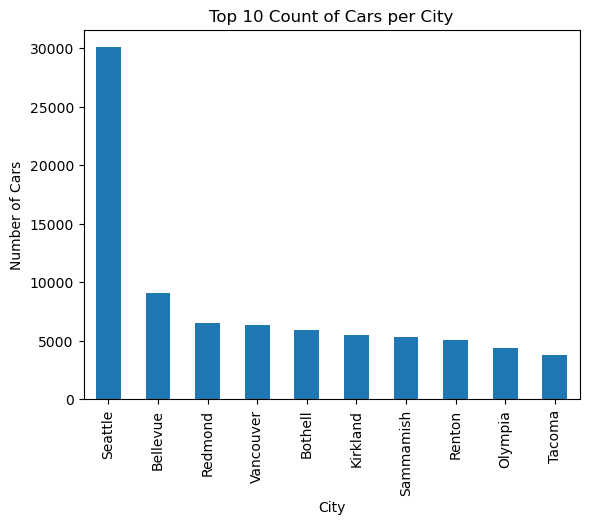

,count
City,
Seattle,30045
Bellevue,9117
Redmond,6568
Vancouver,6329
Bothell,5961
Kirkland,5465
Sammamish,5350
Renton,5104
Olympia,4397


In [53]:
car_counts_Cty = ev['City'].value_counts().nlargest(10)
# plot the counts
car_counts_Cty.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Top 10 Count of Cars per City')
plt.show()

car_counts_cty_ev = car_counts_Cty.to_frame()
car_counts_cty_ev.style.background_gradient(cmap='Blues')

#### Percentage of BEV vs PHEV by Country


In [54]:
Vehicle_type = list(ev.groupby('Electric_Vehicle _Type').count()['County'].index)
values = ev.groupby('Electric_Vehicle _Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

Text(0.5, 1.0, 'Bottom 5 Cars')

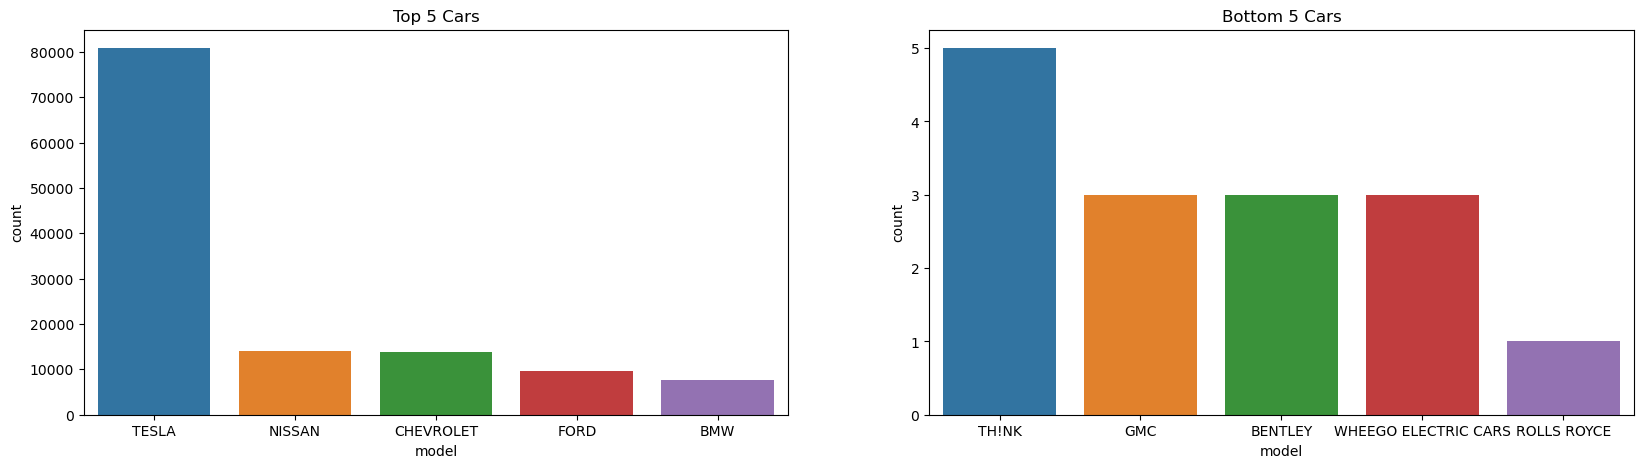

In [55]:
# To view the top 5 vs bottom 5 cars comparision
car_market_share = pd.DataFrame(ev.groupby('Make')['VIN_(1-10)'].count().reset_index()).sort_values(by='VIN_(1-10)',ascending=False).reset_index(drop=True)
car_market_share.columns = ['model','count']
car_market_share_top_5 = car_market_share.head(5)
car_market_share_bottom_5 = car_market_share.tail(5)

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.barplot(data=car_market_share_top_5, x="model", y="count",ax=axes[0])
sns.barplot(data=car_market_share_bottom_5, x="model", y="count",ax=axes[1])
axes[0].set_title('Top 5 Cars')
axes[1].set_title('Bottom 5 Cars')

<Axes: xlabel='Model _Year', ylabel='Count'>

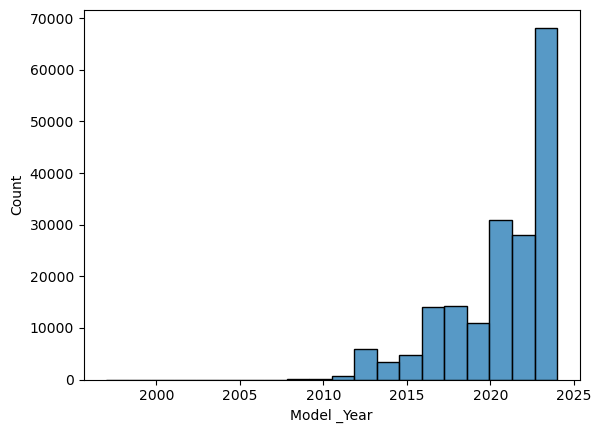

In [56]:
# To view the in which year electric vehicles are increased
sns.histplot(data=ev, x=ev['Model _Year'], bins=20)

In [57]:
import plotly.express as ps
year_wise_cars = ev.groupby('Model _Year')['VIN_(1-10)'].count().reset_index()
year_wise_cars.columns = ['year','num_cars']

fig = ps.line(year_wise_cars,x="year", y="num_cars", title='Year Wise Number of Cars',markers=True)
fig.show()

In [58]:
ev.shape

(181458, 17)

In [59]:
# To Check the Null Values
ev.isnull().sum()[ev.isnull().sum()>0]

County                    3
City                      3
Postal_Code               3
Legislative_District    398
Vehicl_Location           8
Electric_Utility          3
2020_Census_Tract         3
dtype: int64

In [60]:
# ev.Vehicl_Location.value_counts

In [61]:
ev.County = ev.County.fillna('Thurston')
ev.City = ev.City.fillna('Olympia')
ev.Postal_Code = ev.Postal_Code.fillna('98502.0')

ev.Legislative_District = ev.Legislative_District.fillna(ev.Legislative_District.mean())
ev.Vehicl_Location = ev.Vehicl_Location.fillna('POINT (-122.943445 47.059252)')
ev.Electric_Utility = ev.Electric_Utility.fillna('PUGET SOUND ENERGY INC')
ev['2020_Census_Tract'] = ev['2020_Census_Tract'].fillna('5.306701e+10')

In [62]:
# To check if total nulls are completely filled or not
ev.isnull().sum()[ev.isnull().sum()>0]

Series([], dtype: int64)

In [63]:
ev

,VIN_(1-10),County,City,State,Postal_Code,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicl_Location,Electric_Utility,2020_Census_Tract,Electric_Vehicle _Type
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011500.0,Plug-in Hybrid Electric Vehicle (PHEV)
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,53067011100.0,Plug-in Hybrid Electric Vehicle (PHEV)
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,53067012226.0,Battery Electric Vehicle (BEV)
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,53067012620.0,Plug-in Hybrid Electric Vehicle (PHEV)
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,53077000800.0,Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,53017950400.0,Battery Electric Vehicle (BEV)
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,53063012402.0,Plug-in Hybrid Electric Vehicle (PHEV)
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031302.0,Battery Electric Vehicle (BEV)
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040604.0,Battery Electric Vehicle (BEV)


In [64]:
df = ev

Here, i droped some columns, which are not giving meaningful insights according to me. 
The reason to drop some columns is : When preparing a dataset for analysis and modeling, oftenly it is benificial to drop certain columns so that the we will get better and meningful insights. 

#### Here. 
1. VIN_(1-10): It is a unique identifier for each vehicle but does not contribute to understanding trends or making predictions.

2. DOL_Vehicle_ID: This is another unique identifier with high cardinality and likely does not add value to the analysis. A unique identification number for each vehicle present in Transactions dataset. Transactions done on the same vehicle will have the same DOL Vehicle ID.

3. Vehicl_Location: Removing this column simplifies the dataset and focuses the analysis on more relevant features. and other columns like "County" and "City" provide sufficient geographical context for non-geospatial analysis.

4. Legislative_District : Similar information is captured by "County" and "City" Dropping it can reduces the complexicity of the dataset and simplifies the analysis.

5. Electric_Utility : Here migt be high variability and inconsistency. Hence dropping it can simplify the dataset.

6. 2020_Census_Tract : The census tract data might not add significant value. Hence, removing this column simplifies the dataset.

7. Base_MSRP : The MSRP may vary significantly by market and does not necessarily reflect the actual purchase price or incentives, potentially complicating the analysis without adding clear value.


#### So, i will drop these three columns which are 'VIN_(1-10)', 'DOL_Vehicle_ID', 'Vehicl_Location', 'Legislative_District' , 'Electric_Utility',  '2020_Census_Tract' and 'Base_MSRP'.

In [65]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Electric_Vehicle_Population_Data_CP2.csv')

In [66]:
df.drop(['VIN_(1-10)','Postal_Code','Base_MSRP','Legislative_District','DOL_Vehicle_ID','Electric_Utility','2020_Census_Tract'],axis=1,inplace=True)

In [67]:
df

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
0,King,Seattle,WA,2017,AUDI,A3,Not eligible due to low battery range,16,POINT (-122.374105 47.54468),Plug-in Hybrid Electric Vehicle (PHEV)
1,Thurston,Olympia,WA,2018,AUDI,A3,Not eligible due to low battery range,16,POINT (-122.943445 47.059252),Plug-in Hybrid Electric Vehicle (PHEV)
2,Thurston,Lacey,WA,2017,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,POINT (-122.78083 47.083975),Battery Electric Vehicle (BEV)
3,Thurston,Tenino,WA,2021,JEEP,WRANGLER,Not eligible due to low battery range,25,POINT (-122.85403 46.856085),Plug-in Hybrid Electric Vehicle (PHEV)
4,Yakima,Yakima,WA,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,POINT (-120.524012 46.5973939),Battery Electric Vehicle (BEV)
...,...,...,...,...,...,...,...,...,...,...
181453,Douglas,East Wenatchee,WA,2023,LUCID,AIR,Eligibility unknown as battery range has not b...,0,POINT (-120.28674 47.4176),Battery Electric Vehicle (BEV)
181454,Spokane,Spokane Valley,WA,2022,JEEP,WRANGLER,Not eligible due to low battery range,21,POINT (-117.24549 47.6534),Plug-in Hybrid Electric Vehicle (PHEV)
181455,King,Enumclaw,WA,2021,TESLA,MODEL 3,Eligibility unknown as battery range has not b...,0,POINT (-121.98953 47.20347),Battery Electric Vehicle (BEV)
181456,Clark,Vancouver,WA,2020,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,308,POINT (-122.5286031 45.6686601),Battery Electric Vehicle (BEV)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 10 columns):
 #   Column                                              Non-Null Count   Dtype 
---  ------                                              --------------   ----- 
 0   County                                              181455 non-null  object
 1   City                                                181455 non-null  object
 2   State                                               181458 non-null  object
 3   Model _Year                                         181458 non-null  int64 
 4   Make                                                181458 non-null  object
 5   Model                                               181458 non-null  object
 6   Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility  181458 non-null  object
 7   Electric _Range                                     181458 non-null  int64 
 8   Vehicl_Location                                     181450 non-null  objec

#### As we can see, here is the class imbalance. which means for class 1 which is Battery Electric Vehicle (BEV) records are 141973 and for class 2 which is Plug-in Hybrid Electric Vehicle (PHEV), records are 39485

In [69]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [70]:
df.County = le.fit_transform(df.County)
df.City = le.fit_transform(df.City)
df.State = le.fit_transform(df.State)
df.Make = le.fit_transform(df.Make)
df.Model = le.fit_transform(df.Model)
df['Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility'] = df['Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility'].replace({'Eligibility unknown as battery range has not been researched':0, 'Clean Alternative Fuel Vehicle Eligible':1, 'Not eligible due to low battery range':2})
df.Vehicl_Location= le.fit_transform(df.Vehicl_Location)
df['Electric_Vehicle _Type'] = le.fit_transform(df['Electric_Vehicle _Type'])

In [71]:
df

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
0,79,572,42,2017,1,8,2,16,469,1
1,172,448,42,2018,1,8,2,16,616,1
2,172,305,42,2017,34,82,1,210,590,0
3,172,638,42,2021,17,136,2,25,598,1
4,189,721,42,2020,34,81,1,308,262,0
...,...,...,...,...,...,...,...,...,...,...
181453,46,164,42,2023,22,12,0,0,251,0
181454,163,611,42,2022,17,136,2,21,83,1
181455,79,187,42,2021,34,81,0,0,330,0
181456,33,671,42,2020,34,81,1,308,521,0


In [72]:
df.shape

(181458, 10)

In [95]:
# To view Corrlation

x = df.corr().style.background_gradient(cmap='inferno')
x

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
County,1.000000,-0.179501,-0.000358,-0.021846,-0.018501,-0.010471,0.004398,-0.006936,-0.051538,0.003746
City,-0.179501,1.000000,0.004943,0.003298,-0.047983,-0.005588,0.035553,-0.004150,0.010120,0.045514
State,-0.000358,0.004943,1.000000,0.008375,-0.002824,-0.004967,-0.007338,-0.001608,-0.006030,-0.009332
Model _Year,-0.021846,0.003298,0.008375,1.000000,0.109036,0.048167,-0.561468,-0.481541,-0.052041,-0.161964
Make,-0.018501,-0.047983,-0.002824,0.109036,1.000000,0.222449,-0.248422,0.065352,-0.045731,-0.388865
Model,-0.010471,-0.005588,-0.004967,0.048167,0.222449,1.000000,0.094005,-0.101333,-0.032433,0.288191
Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,0.004398,0.035553,-0.007338,-0.561468,-0.248422,0.094005,1.000000,0.419512,0.042110,0.711168
Electric _Range,-0.006936,-0.004150,-0.001608,-0.481541,0.065352,-0.101333,0.419512,1.000000,0.010347,-0.155997
Vehicl_Location,-0.051538,0.010120,-0.006030,-0.052041,-0.045731,-0.032433,0.042110,0.010347,1.000000,0.027269
Electric_Vehicle _Type,0.003746,0.045514,-0.009332,-0.161964,-0.388865,0.288191,0.711168,-0.155997,0.027269,1.000000


In [74]:
# sns.heatmap(df)

In [75]:
df['Electric_Vehicle _Type'].value_counts()*100 / df.shape[0]

Electric_Vehicle _Type
0    78.240144
1    21.759856
Name: count, dtype: float64

In [76]:
x = df.drop(columns=['Electric_Vehicle _Type'])
y = df['Electric_Vehicle _Type']

In [77]:
from sklearn.model_selection import train_test_split
df1, df2 = train_test_split(df, test_size=0.5, random_state=24)

In [78]:
# Assign different target classes to each part
df1['Electric_Vehicle _Type'] = '1'
df2['Electric_Vehicle _Type'] = '0'

# Create class-based dataframes from the original dataset
df_BEV = df[df['Electric_Vehicle _Type'] == '1']
df_PHEV = df[df['Electric_Vehicle _Type'] == '0']

In [79]:
print(df['Electric_Vehicle _Type'].unique())
print('------------------------------------')
print(df['Electric_Vehicle _Type'].value_counts())

[1 0]
------------------------------------
Electric_Vehicle _Type
0    141973
1     39485
Name: count, dtype: int64


In [80]:
# Assign different target classes to each part
df1['Electric_Vehicle _Type'] = 1
df2['Electric_Vehicle _Type'] = 0

# Create class-based dataframes from the original dataset
df_PHEV = df[df['Electric_Vehicle _Type'] == 1]
df_BEV = df[df['Electric_Vehicle _Type'] == 0]

In [81]:
df_BEV.head()

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
2,172,305,42,2017,34,82,1,210,590,0
4,189,721,42,2020,34,81,1,308,262,0
7,160,404,42,2020,34,81,1,322,433,0
10,160,57,42,2018,6,19,1,238,390,0
11,79,572,42,2015,34,82,1,208,456,0


In [83]:
# To view Corrlation for BEV model

df_BEV.corr().style.background_gradient(cmap='coolwarm')

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
County,1.000000,-0.181870,-0.002703,-0.008653,-0.021429,-0.017550,0.000118,-0.007322,-0.033370,nan
City,-0.181870,1.000000,0.002228,-0.008782,-0.040350,-0.030493,0.008734,0.003348,0.024833,nan
State,-0.002703,0.002228,1.000000,0.004396,-0.007223,-0.006743,-0.002382,-0.003953,-0.006208,nan
Model _Year,-0.008653,-0.008782,0.004396,1.000000,-0.006309,0.059978,-0.840077,-0.621423,-0.048087,nan
Make,-0.021429,-0.040350,-0.007223,-0.006309,1.000000,0.541088,-0.025036,0.018471,-0.070562,nan
Model,-0.017550,-0.030493,-0.006743,0.059978,0.541088,1.000000,-0.104963,-0.092216,-0.060839,nan
Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,0.000118,0.008734,-0.002382,-0.840077,-0.025036,-0.104963,1.000000,0.909211,0.039618,nan
Electric _Range,-0.007322,0.003348,-0.003953,-0.621423,0.018471,-0.092216,0.909211,1.000000,0.016757,nan
Vehicl_Location,-0.033370,0.024833,-0.006208,-0.048087,-0.070562,-0.060839,0.039618,0.016757,1.000000,nan
Electric_Vehicle _Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [84]:
df_PHEV.head()

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
0,79,572,42,2017,1,8,2,16,469,1
1,172,448,42,2018,1,8,2,16,616,1
3,172,638,42,2021,17,136,2,25,598,1
5,172,448,42,2023,17,136,2,21,607,1
6,81,294,42,2017,6,134,1,53,547,1


In [86]:
# To view Corrlation for PHEV model

df_PHEV.corr().style.background_gradient(cmap='coolwarm')

,County,City,State,Model _Year,Make,Model,Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,Electric _Range,Vehicl_Location,Electric_Vehicle _Type
County,1.000000,-0.173273,0.006090,-0.056981,-0.010454,-0.003241,0.009974,-0.001531,-0.105151,nan
City,-0.173273,1.000000,0.014425,0.067694,-0.011429,-0.000857,-0.009623,0.001099,-0.040090,nan
State,0.006090,0.014425,1.000000,0.012870,-0.006495,0.004249,0.002727,0.004086,-0.004733,nan
Model _Year,-0.056981,0.067694,0.012870,1.000000,0.186867,0.168735,-0.109887,-0.027884,-0.048827,nan
Make,-0.010454,-0.011429,-0.006495,0.186867,1.000000,0.141395,0.234687,-0.238953,0.044309,nan
Model,-0.003241,-0.000857,0.004249,0.168735,0.141395,1.000000,-0.291013,0.109604,-0.013671,nan
Clean_Alternative_Fuel_Vehicle _(CAFV)_Eligibility,0.009974,-0.009623,0.002727,-0.109887,0.234687,-0.291013,1.000000,-0.690543,0.011170,nan
Electric _Range,-0.001531,0.001099,0.004086,-0.027884,-0.238953,0.109604,-0.690543,1.000000,0.013094,nan
Vehicl_Location,-0.105151,-0.040090,-0.004733,-0.048827,0.044309,-0.013671,0.011170,0.013094,1.000000,nan
Electric_Vehicle _Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


#### Conclusion : 
So, this dataset is all about Electric Vehicle Population Got from the "us.gov" website. <br>
It was very challanging to convert the dataset and was challanging for data Cleaning. <br>
But With the help of EDA it was easy to get insights from this dataset.
<br>
#### Observations:
- We observe Some Observations.
1. Distribution of Model Year.
2. Distribution of Electric Range Of the Vehicle.
3. Count of Clean Alternative Fuel Vehicle (CAFV) Eligibility.
4. Count of Electric Vehicle Type.
5. Percentage of BEV vs PHEV by Country.
6. Year wise number of cars.
<br>
- As well as we have answered some questions to generate insights from the dataset.
1. What is the Year Wise Cars sales growth?
2. What are the Top 10 count of cars per Country?
3. What is the Top 10 count of cars per city?
4. What is the Top 10 count of cars per county?
4. What are the Top 5 vs Bottom 5 Comparison?
5. In which Year Electric Vehicles increased?
6. what are the Top 10 Companies making Electric Vehicle?
<br>
<br>
#### Conclusion:
- The top 10 counts of cars per county, city, state, and postal code were determined.
- Washington had the most cars registered by state, followed by California and Virginia.
- Seattle is the top city followed by Bellevue in top 10 with electric Cars.
- King County is the top in top 10 county with more electric Vehicles followed by Snohomish and Pierce.
- Tesla is the top 10 company making Maximum Electric Vehicles followed by Nissan, Chevrolet and Ford.
- 98052 postal code contains the high electric cars.
- JAGUR have the more electric range comapre to other makes.
- From 2008 to 2022 the no of electric vehicles are increased.
- Tesla is the most popular electric car make in Washington state, followed by Nissan and Chevrolet.
- Tesla is also the most popular make in Seattle, followed by Nissan, Chevrolet, and BMW.
- Tesala, Nissan, Ford, BMW are top 5 Cars where, Think, Bently Model are bottom 5 Cars.

#### Future Work
- Not only TESLA All the makes have to make the Electric Vehicles in Future.
- All models are made the Electric Vehicles.
- Not only Washington state all over world should use the Electric Vehicles.
- Coming Years Electric Vehicle Usage Should be increased.
- TOYOTA and VOLKSWAGEN companies have only few electric vehicles need to increase.